# Binary Classification
In this example, we will build a multi-input single-output neural network model to classify toy samples into two categories.

1. Load dataset: X (features), y (labels)
2. Initialize model (with random parameters: w, b)
3. Evaluate the model with a metric (e.g. BCE).
4. Calculate gradient of loss.
5. Update parameters a small step on the directions descending the gradient of loss.
6. Repeat 3 to 5 until converge.



## Load Raw Data
[scikit-learn](https://scikit-learn.org/stable/index.html) is a handy machine learning library for Python. We can creat an artificial dataset for the binary classification task using its [datasets](https://scikit-learn.org/stable/api/sklearn.datasets.html) module.

In [4]:
from sklearn.datasets import make_moons
import numpy as np
features_raw, labels_raw = make_moons(n_samples=1024, noise=0.2, random_state=3321)
print(features_raw.shape, labels_raw.shape)
print(features_raw[:10])
print(labels_raw[:10])

(1024, 2) (1024,)
[[-0.86691851 -0.32027284]
 [ 1.70922817 -0.66094909]
 [ 0.95477398  0.28453102]
 [ 0.14465106  0.33336045]
 [ 0.58070122  0.65058253]
 [ 1.33531488 -0.2647643 ]
 [ 1.46344736 -0.55310411]
 [-1.20787839  0.52778545]
 [ 0.47737585 -0.2020379 ]
 [ 1.45674566 -0.27188258]]
[0 1 0 1 0 1 1 0 1 1]


### Visualize the Data Feature-Wise


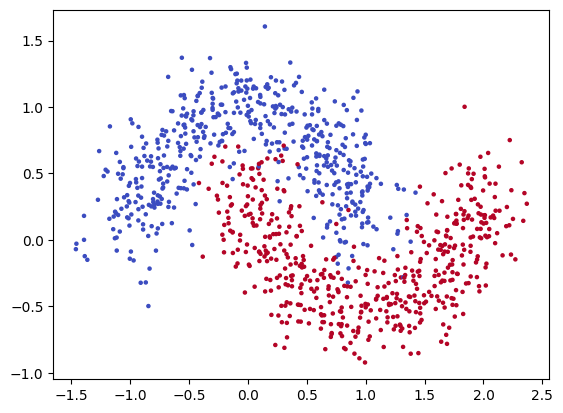

In [5]:
import matplotlib.pyplot as plt

plt.scatter(
    features_raw[:, 0], # feature 1 value, x coords
    features_raw[:, 1], # feature 2 value, y coords
    s=5*np.ones(labels_raw.size), # marker size all set to 1
    c=labels_raw, # colorized labels: 0:blue, 1:red
    cmap='coolwarm'  # color map
)


### Regulate the Data
1. Rescale features matrix.
2. Reshape label vector.

(1024, 2) (1024, 1)


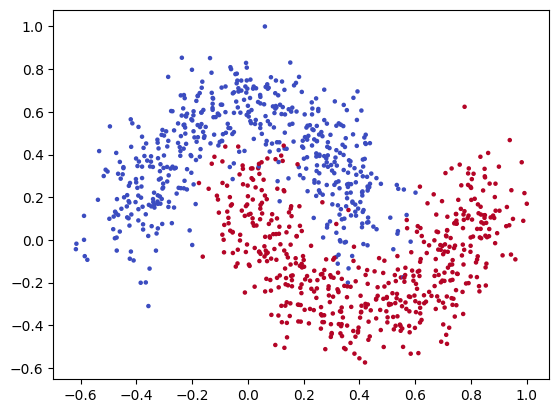

In [6]:
# Rescale by max
features_train = features_raw / features_raw.max(axis=0)

# Reshape labels
labels_train = labels_raw.reshape(-1, 1)
print(features_train.shape, labels_train.shape)  # for debug

# Visualize
plt.scatter(
    features_train[:, 0], 
    features_train[:, 1], 
    s=5*np.ones(labels_train.size), 
    c=labels_train, 
    cmap='coolwarm'
)

## Linear Model
 
$\hat{\mathbf{y}} = \mathbf{X} \cdot \mathbf{w}^T + \mathbf{b}$

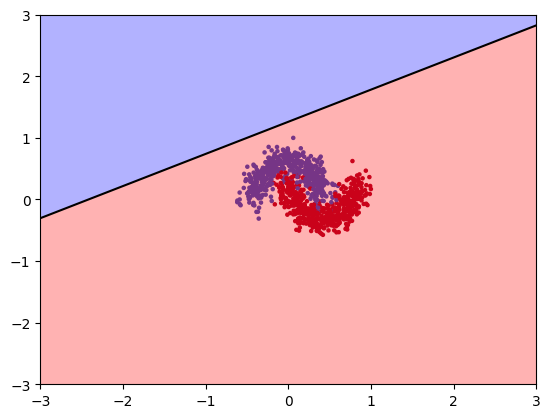

In [7]:
# Define model function
def linear(in_features, weights, bias):
    preds = in_features @ weights.T + bias
    return preds

# Sanity check
w_dummy = np.array([[1.2, -2.3]]) 
b_dummy = 3.4
y_pred_dummy = linear(features_train, w_dummy, b_dummy)


# Decision boundary
db_x = np.linspace(-3., 3.)
db_y = (0.5 - b_dummy - w_dummy[0, 0] * db_x) / w_dummy[0, 1]
plt.scatter(features_train[:, 0], features_train[:, 1], s=5*np.ones(labels_train.size), c=labels_train, cmap='coolwarm')
plt.plot(db_x, db_y, 'k')
# Create a meshgrid of points over the feature space
xx, yy = np.meshgrid(np.linspace(-3., 3., 300),
                     np.linspace(-3., 3., 300))
zz = w_dummy[0, 0] * xx + w_dummy[0, 1] * yy + b_dummy - 0.5
plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.3)



## Mean Squared Error (MSE) Loss Function
Evaluate model performance with MSE loss: $\mathcal{L}(\hat{\mathbf{y}}, \mathbf{y}) = \frac{1}{M} \sum_{i=1}^{M} \frac{1}{2} ({}^{(i)}\hat{y} - {}^{(i)}y)^2 = \frac{1}{2} \overline{(\hat{\mathbf{y}} - \mathbf{y})^2}$

In [8]:
def mse_loss(preds, labels):
    error = 0.5 * (preds - labels) ** 2
    return np.mean(error)

# Sanity check
loss = mse_loss(preds=linear(features_train, w_dummy, b_dummy), labels=labels_train)
print(f"mse loss: {loss}")

mse loss: 4.202149428445785


## Gradient Descent Optimization

initial parameters: w = [[3.09522688e-05 8.65443512e-05]], b = 9.585742034260125e-06
loss @ 1 iteration: 0.24999237699549343
loss @ 2 iteration: 0.23553015144576614
loss @ 3 iteration: 0.22247578132730483
loss @ 4 iteration: 0.21068400792661654
loss @ 5 iteration: 0.20002470623978708
loss @ 6 iteration: 0.1903813057481371
loss @ 7 iteration: 0.18164937603185544
loss @ 8 iteration: 0.17373536001521694
loss @ 9 iteration: 0.16655543943307366
loss @ 10 iteration: 0.16003451871690258
loss @ 11 iteration: 0.15410531493937762
loss @ 12 iteration: 0.14870754274673292
loss @ 13 iteration: 0.14378718436379423
loss @ 14 iteration: 0.13929583579154076
loss @ 15 iteration: 0.13519012124400473
loss @ 16 iteration: 0.13143116870150595
loss @ 17 iteration: 0.12798414020074717
loss @ 18 iteration: 0.12481781114821272
loss @ 19 iteration: 0.12190419353971804
loss @ 20 iteration: 0.11921819850310722
loss @ 21 iteration: 0.11673733405948834
loss @ 22 iteration: 0.11444143442685265
loss @ 23 iteration: 0.

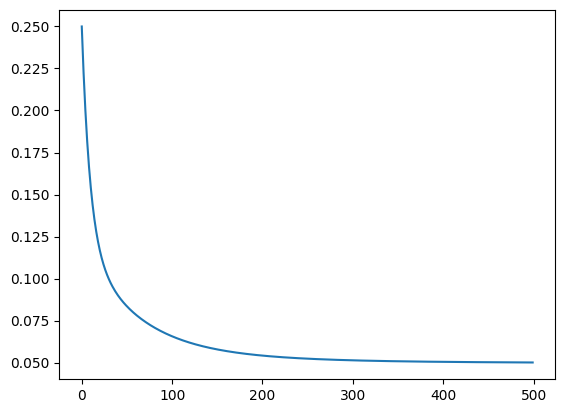

In [9]:
# Define gradient computation function
def grad(in_features, preds, labels):
    dw = 1 / labels.shape[0] * ((preds - labels).T @ in_features)  # dL/dw
    db = np.mean(preds - labels)  # dL/db 
    return dw, db

# Init parameters
w = np.random.normal(0, 1e-4, (1, 2)) 
b = np.random.normal(0, 1e-4)
print(f"initial parameters: w = {w}, b = {b}")
# Gradient descent optimization
num_iters = 500
learning_rate = 0.05
losses = []
for i in range(num_iters):
    preds_train = linear(features_train, w, b)
    dw, db = grad(features_train, preds_train, labels_train)
    loss = mse_loss(preds_train, labels_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    print(f"loss @ {i+1} iteration: {loss}")
    losses.append(loss)
print(f"final parameters: w = {w}, b = {b}")

# Observe the loss change
plt.plot(losses)

### Visualize Decision Boundary


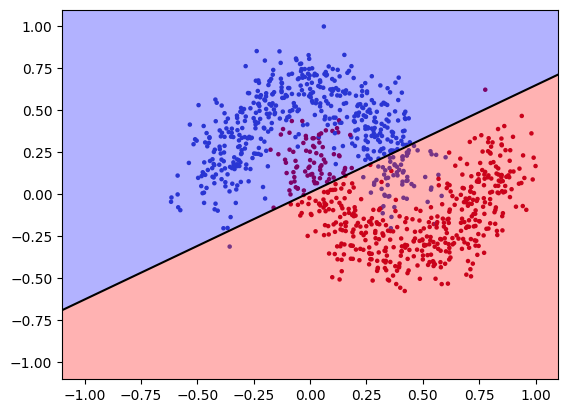

In [10]:
# Credit to ChatGPT
# Create a meshgrid of points over the feature space
xx, yy = np.meshgrid(np.linspace(-1.1, 1.1, 200),
                     np.linspace(-1.1, 1.1, 200))
zz = w[0, 0] * xx + w[0, 1] * yy + b - 0.5


bound_x = np.linspace(-1.1, 1.1)
bound_y = (0.5 - b - w[0, 0] * bound_x) / w[0, 1]
plt.scatter(features_train[:, 0], features_train[:, 1], s=5*np.ones(labels_train.size), c=labels_train, cmap='coolwarm')
plt.plot(bound_x, bound_y, 'k')
plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.3)



## Upgrade Model and Assessment
### Linear Model Activated by Sigmoid Function
$\hat{\mathbf{y}} = \sigma(\mathbf{z}) = \sigma(\mathbf{X} \cdot \mathbf{w}^T + \mathbf{b})$, where $\sigma (\mathbf{z}) = 1 / (1 + e^{-\mathbf{z}})$

In [11]:
# Define Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Redefine forward pass.
def forward(in_features, weights, bias):
    preds = sigmoid(linear(in_features, weights, bias))
    return preds


### Binary Cross-Entropy Loss
$\mathcal{L}(\hat{\mathbf{y}}, \mathbf{y}) = \frac{1}{M} \sum_{i=1}^{M} -{}^{(i)}y \ln {}^{(i)}\hat{y} - (1 - {}^{(i)}y) \ln (1 - {}^{(i)}\hat{y}) = \overline{-\mathbf{y} \ln \hat{\mathbf{y}} - (1 - \mathbf{y}) \ln (1 - \hat{\mathbf{y}})}$

#### Gradient computation
BCE loss is able to simplify loss gradient computation.
- MSE loss gradient:

    $\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \frac{1}{M} [(\hat{\mathbf{y}} - \mathbf{y}) * \hat{\mathbf{y}} * (1 - \hat{\mathbf{y}})]^T \cdot \mathbf{X}$

    $\frac{\partial \mathcal{L}}{\partial b} = \overline{(\hat{\mathbf{y}} - \mathbf{y}) * \hat{\mathbf{y}} * (1 - \hat{\mathbf{y}})}$

- BCE loss gradient: 

    $\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \frac{1}{M} (\hat{\mathbf{y}} - \mathbf{y})^T \cdot \mathbf{X}$

    $\frac{\partial \mathcal{L}}{\partial b} = \overline{(\hat{\mathbf{y}} - \mathbf{y})}$


initial parameters: w = [[2.43372186e-05 2.25790119e-05]], b = -6.304748307479645e-05
loss @ 1 iteration: 0.1250000195531388
loss @ 2 iteration: 0.11946792862668122
loss @ 3 iteration: 0.11436967808240865
loss @ 4 iteration: 0.10967962722921719
loss @ 5 iteration: 0.10537086532505538
loss @ 6 iteration: 0.10141606987903577
loss @ 7 iteration: 0.09778819085000941
loss @ 8 iteration: 0.0944609712829712
loss @ 9 iteration: 0.09140932114091475
loss @ 10 iteration: 0.0886095654850389
loss @ 11 iteration: 0.08603958982781547
loss @ 12 iteration: 0.08367890482829377
loss @ 13 iteration: 0.0815086503164579
loss @ 14 iteration: 0.07951155568713938
loss @ 15 iteration: 0.07767187056394483
loss @ 16 iteration: 0.07597527665979818
loss @ 17 iteration: 0.07440878914266899
loss @ 18 iteration: 0.07296065362437301
loss @ 19 iteration: 0.07162024312594206
loss @ 20 iteration: 0.07037795799504969
loss @ 21 iteration: 0.06922513070283953
loss @ 22 iteration: 0.06815393666952553
loss @ 23 iteration: 0.06

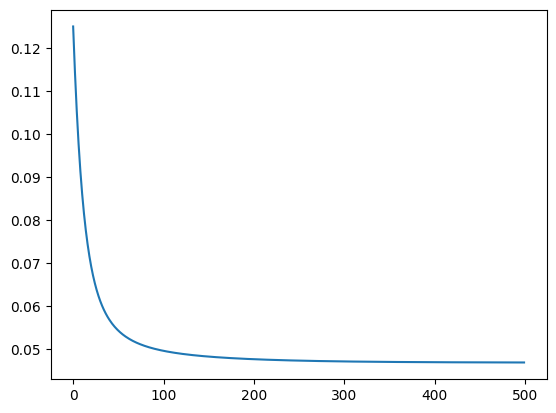

In [12]:
def bce_loss(preds, labels):
    error = -labels * np.log(preds) - (1 - labels) * np.log(1 - preds)
    return np.mean(error)

# Optimization iterations
w = np.random.normal(0, 1e-4, (1, 2)) 
b = np.random.normal(0, 1e-4)
print(f"initial parameters: w = {w}, b = {b}")
num_iters = 500
learning_rate = 0.9
losses = []
for i in range(num_iters):
    pred_train = forward(features_train, w, b)
    dw, db = grad(features_train, pred_train, labels_train)
    loss = mse_loss(pred_train, labels_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    print(f"loss @ {i+1} iteration: {loss}")
    # print(f"w = {w}, b = {b}")
    losses.append(loss)
print(f"final parameters: w = {w}, b = {b}")

# Observe loss values
plt.plot(losses)

### Visualize Sigmoid Function Activated Model Decision

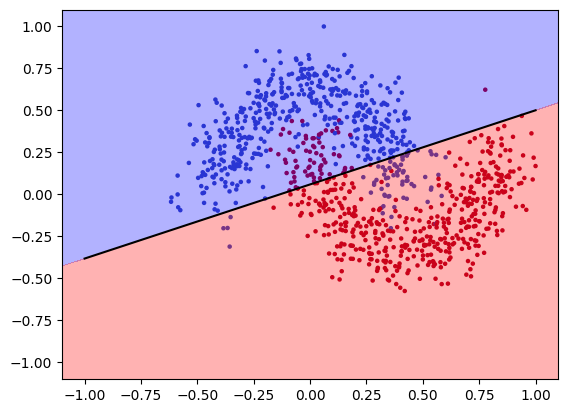

In [14]:
# Credit to ChatGPT
# Create a meshgrid of points over the feature space
xx, yy = np.meshgrid(np.linspace(-1.1, 1.1, 200),
                     np.linspace(-1.1, 1.1, 200))
zz = sigmoid(w[0, 0] * xx + w[0, 1] * yy + b) - 0.5


db_x = np.linspace(-1.0, 1.0, 1000)
db_y = (-b - w[0, 0] * db_x) / w[0, 1]
plt.scatter(features_train[:, 0], features_train[:, 1], s=5*np.ones(labels_train.size), c=labels_train, cmap='coolwarm')
plt.plot(db_x, db_y, 'k')
plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.3)




## 